In [1]:
##ML Assignment, Ivan Tomaš, s2046587

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import f_regression
from scipy.stats import moment
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import time

In [3]:
df_pandas = pd.read_csv(r'C:\Users\Ivan\Desktop\2046587\2046587_mocap.csv', index_col = 0)

In [4]:
#1.2 Number of istances and index number

k1 = 0
k2 = 0
k3 = 0
k4 = 0
k5 = 0
for i in np.arange(0, len(df_pandas['Class']),1):
    if df_pandas['Class'][i] == 1:
        k1 = k1 + 1
    if df_pandas['Class'][i] == 2:
        k2 = k2 + 1
    if df_pandas['Class'][i] == 3:
        k3 = k3 + 1
    if df_pandas['Class'][i] == 4:
        k4 = k4 + 1
    if df_pandas['Class'][i] == 5:
        k5 = k5 + 1
        

print("Total data points: {}".format(len(df_pandas['Class'])))

print("Number of instances with class 1: {}".format(k1))
print("Number of instances with class 2: {}".format(k2))
print("Number of instances with class 3: {}".format(k3))
print("Number of instances with class 4: {}".format(k4))
print("Number of instances with class 5: {}".format(k5))
print("Classes that I have are: 2, 4, 5")


Total data points: 4550
Number of instances with class 1: 0
Number of instances with class 2: 1498
Number of instances with class 3: 0
Number of instances with class 4: 1478
Number of instances with class 5: 1574
Classes that I have are: 2, 4, 5


In [5]:
index_2 = []
index_4 = []
index_5 = []

for i in np.arange(0, len(df_pandas['Class']),1):
    if df_pandas['Class'][i] == 2:
        index_2.append(i)
    if df_pandas['Class'][i] == 4:
        index_4.append(i)
    if df_pandas['Class'][i] == 5:
        index_5.append(i)
        
print("Some idex values that belong to class 2\n ", index_2[0:10])
print("Some index values that belong to class 4:\n ", index_4[0:10])
print("Some index values that belong to class 5:\n ", index_5[0:10])
print("I display just first 10 values instead of whole matrix")
print("Now I can use index 0 for class 2, index 150 for class 4 and index 328 for class5")

Some idex values that belong to class 2
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Some index values that belong to class 4:
  [150, 151, 152, 153, 154, 155, 156, 157, 158, 159]
Some index values that belong to class 5:
  [328, 329, 330, 331, 332, 333, 334, 335, 336, 337]
I display just first 10 values instead of whole matrix
Now I can use index 0 for class 2, index 150 for class 4 and index 328 for class5


In [4]:
df = np.array(df_pandas)
print(df[0,0])   #in 0th column classification is 2
print(df[150,0]) #in 150th column classification is 4
print(df[328,0]) # in 328th column classification is 5

x_values_2 = df[752, 1:13]
y_values_2 = df[752, 13:25]
z_values_2 = df[752, 25:37]

x_values_4 = df[150, 1:13]
y_values_4 = df[150, 13:25]
z_values_4 = df[150, 25:37]

x_values_5 = df[328, 1:13]
y_values_5 = df[328, 13:25]
z_values_5 = df[328, 25:37]

2.0
4.0
5.0


Text(0.5, 0.92, 'Class 5, X VS Y VS Z')

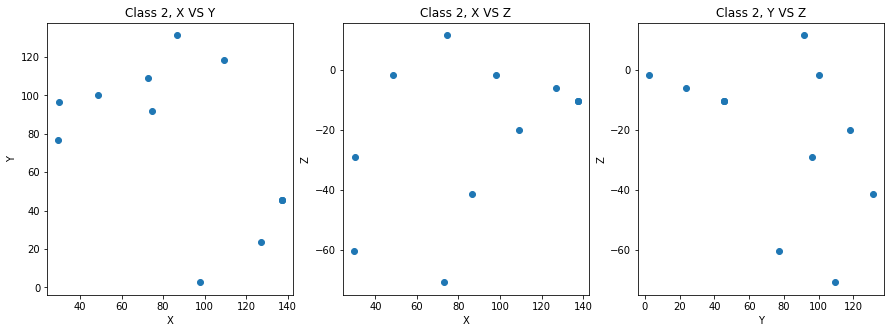

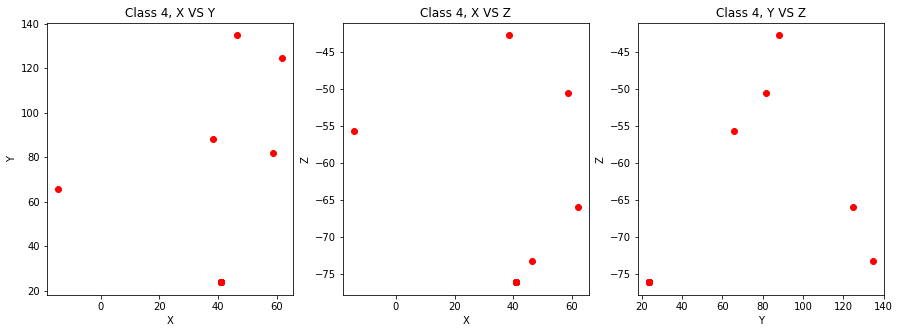

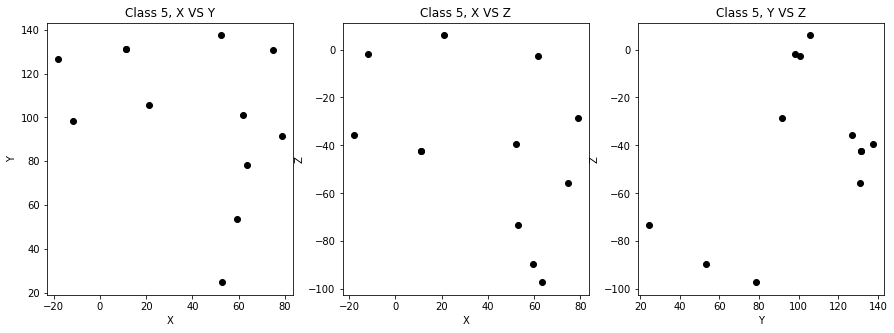

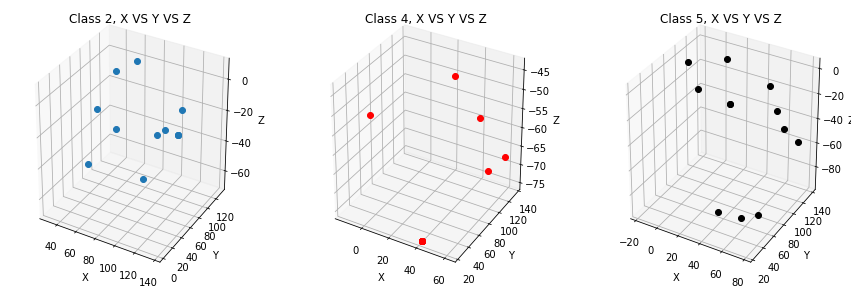

In [7]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
axes[0].plot(x_values_2, y_values_2, 'o')
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Class 2, X VS Y")

axes[1].plot(x_values_2, z_values_2, 'o')
axes[1].set_xlabel("X")
axes[1].set_ylabel("Z")
axes[1].set_title("Class 2, X VS Z")

axes[2].plot(y_values_2, z_values_2, 'o')
axes[2].set_xlabel("Y")
axes[2].set_ylabel("Z")
axes[2].set_title("Class 2, Y VS Z")


fig, axes = plt.subplots(1,3, figsize = (15,5))
axes[0].plot(x_values_4, y_values_4, 'ro')
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Class 4, X VS Y")

axes[1].plot(x_values_4, z_values_4, 'ro')
axes[1].set_xlabel("X")
axes[1].set_ylabel("Z")
axes[1].set_title("Class 4, X VS Z")

axes[2].plot(y_values_4, z_values_4, 'ro')
axes[2].set_xlabel("Y")
axes[2].set_ylabel("Z")
axes[2].set_title("Class 4, Y VS Z")


fig, axes = plt.subplots(1,3, figsize = (15,5))
axes[0].plot(x_values_5, y_values_5, 'ko')
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Class 5, X VS Y")

axes[1].plot(x_values_5, z_values_5, 'ko')
axes[1].set_xlabel("X")
axes[1].set_ylabel("Z")
axes[1].set_title("Class 5, X VS Z")

axes[2].plot(y_values_5, z_values_5, 'ko')
axes[2].set_xlabel("Y")
axes[2].set_ylabel("Z")
axes[2].set_title("Class 5, Y VS Z")

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,3,1, projection = '3d')
plt.plot(x_values_2, y_values_2, z_values_2, 'o')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Class 2, X VS Y VS Z")

ax = fig.add_subplot(1,3,2, projection = '3d')
plt.plot(x_values_4, y_values_4, z_values_4, 'ro')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Class 4, X VS Y VS Z")

ax = fig.add_subplot(1,3,3, projection = '3d')
plt.plot(x_values_5, y_values_5, z_values_5, 'ko')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Class 5, X VS Y VS Z")


In [5]:
#Preprocess the data
y = df[:,0]
X_start = df[:, 1:37]
X_step1 = np.delete(X_start, [11, 23, 35], 1)

In [9]:
X_2 = np.zeros((len(index_2), 12))
Y_2 = np.zeros((len(index_2), 12))
Z_2 = np.zeros((len(index_2), 12))
k = 0
for i in index_2:
    for j in np.arange(0,12,1):
        X_2[k, j] = X_start[i,j]
        Y_2[k, j] = X_start[i, j + 12]
        Z_2[k, j] = X_start[i, j + 24]
    
    k = k + 1

X_4 = np.zeros((len(index_4), 12))
Y_4 = np.zeros((len(index_4), 12))
Z_4 = np.zeros((len(index_4), 12))
k = 0
for i in index_4:
    for j in np.arange(0,12,1):
        X_4[k, j] = X_start[i,j]
        Y_4[k, j] = X_start[i, j + 12]
        Z_4[k, j] = X_start[i, j + 24]
    
    k = k + 1
    
X_5 = np.zeros((len(index_5), 12))
Y_5 = np.zeros((len(index_5), 12))
Z_5 = np.zeros((len(index_5), 12))
k = 0
for i in index_5:
    for j in np.arange(0,12,1):
        X_5[k, j] = X_start[i,j]
        Y_5[k, j] = X_start[i, j + 12]
        Z_5[k, j] = X_start[i, j + 24]
    
    k = k + 1

In [10]:
print("Shape of X, Y and Z for class 2: {}".format(np.shape(X_2)))
print("Shape of X, Y and Z for class 4: {}".format(np.shape(X_4)))
print("Shape of X, Y and Z for calss 5: {}".format(np.shape(X_5)))

k = 0
special_i_1 = []
for i in np.arange(0,len(X_2),1):
    if (X_2[i,10] == X_2[i,11]) & (Y_2[i,10] == Y_2[i,11]) & (Z_2[i,10] == Z_2[i,11]):
        k = k + 1
    else:
        special_i_1.append(i)
        
print("\nNumber of observations in class 2 with same 2 last values: ", k)
print("Row in which they are not equal: {}".format(special_i_1))

k = 0
special_i_2 = []
for i in np.arange(0, len(X_4),1):
    if (X_4[i,11] == X_4[i,10] == X_4[i,9] == X_4[i,8]) & (Y_4[i,11] == Y_4[i,10] == Y_4[i,9] == Y_4[i,8]) & (Z_4[i,11] == Z_4[i,10] == Z_4[i,9] == Z_4[i,8]):
        k = k + 1
    else:
        special_i_2.append(i)
print("\nNumber of observations in class 4 with same last 4 values: {}".format(k))
print("Row in which they are not equal: {}".format(special_i_2))

k = 0
special_i_3 = []
for i in np.arange(0,len(X_5),1):
    if (X_5[i,10] == X_5[i,11]) & (Y_5[i,10] == Y_5[i,11]) & (Z_5[i,10] == Z_5[i,11]):
        k = k + 1
    else:
        special_i_3.append(i)

print("\nNumber of observations in class 5 with same last 5 values: {}".format(k))
print("Row in which they are not equal: {}".format(special_i_3))

Shape of X, Y and Z for class 2: (1498, 12)
Shape of X, Y and Z for class 4: (1478, 12)
Shape of X, Y and Z for calss 5: (1574, 12)

Number of observations in class 2 with same 2 last values:  1495
Row in which they are not equal: [752, 1119, 1120]

Number of observations in class 4 with same last 4 values: 1477
Row in which they are not equal: [674]

Number of observations in class 5 with same last 5 values: 1574
Row in which they are not equal: []


In [312]:
#1.3

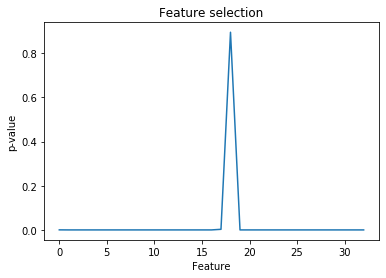

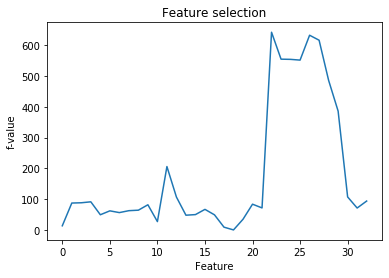

In [6]:
f_values, p_values = f_regression(X_step1, y)
plt.figure()
plt.plot(p_values)
plt.xlabel("Feature")
plt.ylabel("p-value")
plt.title("Feature selection")

plt.figure()
plt.plot(f_values)
plt.xlabel("Feature")
plt.ylabel("f-value")
plt.title("Feature selection")


below_median_features = []
for i in np.arange(0,len(p_values), 1):
    if f_values[i] < np.median(f_values):
        below_median_features.append(i)

In [7]:
for i in np.arange(0,len(p_values), 1):
    if p_values[i] > 0.01:
        print(i)


print("Feature in column 19 of X seems unimportant for predicting the y therefore I will exclude it from X in order to get better prediction analysis")
X_step2 = np.delete(X_step1, [18], 1)

print(np.shape(X_step2))

18
Feature in column 19 of X seems unimportant for predicting the y therefore I will exclude it from X in order to get better prediction analysis
(4550, 32)


In [8]:
#Final X
X = X_step2

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
start = time.time()
logreg = LogisticRegression(max_iter = 10000)
lr_without_cv = logreg.fit(X_train, y_train)
end = time.time()
print("Logistic regression accurancy without cross-validation: {:.2f}".format(lr_without_cv.score(X_test, y_test)))
print('Time: {:.2f}'.format(end - start))
pred = lr_without_cv.predict(X_test)
print(classification_report(y_test, pred))

Logistic regression accurancy without cross-validation: 0.78
Time: 0.30
              precision    recall  f1-score   support

         2.0       0.80      0.88      0.84       375
         4.0       0.79      0.72      0.75       369
         5.0       0.75      0.74      0.74       394

    accuracy                           0.78      1138
   macro avg       0.78      0.78      0.78      1138
weighted avg       0.78      0.78      0.78      1138



In [16]:
start = time.time()
logreg = LogisticRegression(max_iter = 10000)
scores = cross_val_score(logreg, X, y, cv = 5)
end = time.time()
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation scores: {:.2f}".format(scores.mean()))
print("Time: {:.2f}".format(end - start))
print("We can notice big difference in accurancy depending on which training data we use")

Cross-validation scores: [0.53846154 0.67032967 0.81978022 0.8032967  0.80879121]
Average cross-validation scores: 0.73
Time: 3.61
We can notice big difference in accurancy depending on which training data we use


Train accurancy with grid search: 0.79
Best parameter: {'C': 0.001, 'multi_class': 'ovr'}
Accurancy on test: 0.78

Time: 17.12


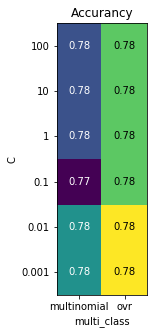

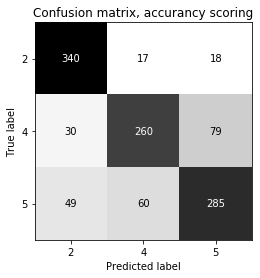

In [17]:
start = time.time()
logreg = LogisticRegression(max_iter = 10000, solver = 'lbfgs')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'multi_class' : ['multinomial', 'ovr']}
grid_search = GridSearchCV(logreg, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,2)
end = time.time()

plt.figure(figsize=(8,5))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'multi_class', ylabel = 'C', xticklabels = param_grid['multi_class'], yticklabels = param_grid['C'], cmap = 'viridis')
plt.title("Accurancy")

print("Train accurancy with grid search: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()



In [ ]:
#I will implement dimensionality reduction using PCA. Then, simoultaneously, I
#will analyze original data set and dimension reduced data set to compare the
#results. Number of dimension used will be determined using Logistic Regression

In [18]:
test_accurancy = []
train_accurancy = []

for i in np.arange(1,33,1):
    pca = PCA(n_components = i)
    pca.fit(X)
    X_pca = pca.transform(X)
    X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, stratify = y)
    logreg = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr', C = 1)
    logreg.fit(X_pca_train, y_pca_train)
    
    test_accurancy.append(logreg.score(X_pca_test, y_pca_test))
    train_accurancy.append(logreg.score(X_pca_train, y_pca_train))
    print(i)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


0.7231985940246046

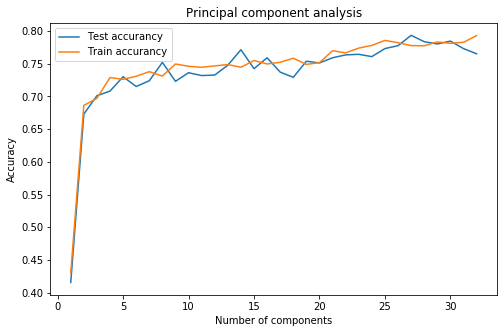

In [23]:
plt.figure(figsize = (8,5))
plt.plot(np.arange(1,33,1), test_accurancy, label = 'Test accurancy')
plt.plot(np.arange(1,33,1), train_accurancy, label = 'Train accurancy')
plt.legend()
plt.xlabel("Number of components")
plt.ylabel("Accuracy")
plt.title("Principal component analysis")
#Since already on n_components = 7 result is very good, I will analyze the result
#with PCA, n_components = 7

In [13]:
pca = PCA(n_components = 7)
pca.fit(X)
X_pca = pca.transform(X)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, stratify = y)


In [14]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
print("X_train shape: {}".format(np.shape(X_train)))
print("X_test shape: {}".format(np.shape(X_test)))


X_train shape: (3412, 32)
X_test shape: (1138, 32)


In [28]:
normalizer = StandardScaler()
normalizer.fit(X_train, y_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)


In [29]:
logreg = LogisticRegression(max_iter = 10000, C = 1)
lr = logreg.fit(X_train_scaled, y_train)
print("Accurancy with MinMax Scalar: {:.2f}".format(lr.score(X_test_scaled, y_test)))

logreg = LogisticRegression(max_iter = 10000, C = 1)
lr = logreg.fit(X_train_normalized, y_train)
print("Accurancy with normalization: {:.2f}".format(lr.score(X_test_normalized, y_test)))



Accurancy with MinMax Scalar: 0.78
Accurancy with normalization: 0.78


In [17]:
#logreg scaled 
start = time.time()
logreg = LogisticRegression(max_iter = 10000, solver = 'lbfgs')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'multi_class' : ['multinomial', 'ovr']}
grid_search = GridSearchCV(logreg, param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)
end = time.time()

print("Best parameters: {}".format(grid_search.best_params_))
print("Test accuracy: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
print("Time: {:.2f}".format(end - start))

Best parameters: {'C': 100, 'multi_class': 'ovr'}
Test accuracy: 0.78
Time: 7.58


In [18]:
#logreg auc
start = time.time()
logreg = LogisticRegression(max_iter = 10000, solver = 'lbfgs')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'multi_class' : ['multinomial', 'ovr']}
grid_search = GridSearchCV(logreg, param_grid, cv = 5, scoring = 'roc_auc_ovr')
grid_search.fit(X_train_scaled, y_train)
end = time.time()

print("Best parameters: {}".format(grid_search.best_params_))
print("Test accuracy: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
print("Time: {:.2f}".format(end - start))

Best parameters: {'C': 100, 'multi_class': 'multinomial'}
Test accuracy: 0.90
Time: 7.51


In [21]:
#logreg pca
start = time.time()
logreg = LogisticRegression(max_iter = 10000, solver = 'lbfgs')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'multi_class' : ['multinomial', 'ovr']}
grid_search = GridSearchCV(logreg, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
end = time.time()

print("Best parameters: {}".format(grid_search.best_params_))
print("Test accuracy: {:.2f}".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))

Best parameters: {'C': 0.001, 'multi_class': 'ovr'}
Test accuracy: 0.73
Time: 2.69


Best parameter: {'n_neighbors': 1, 'weights': 'uniform'}
Accurancy on test: 0.84

Time: 17.53


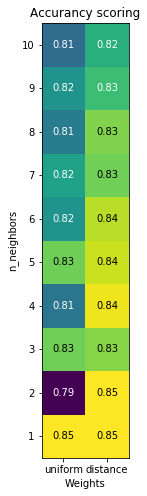

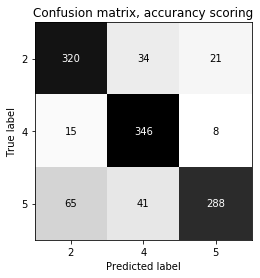

In [30]:
##Checking other learners
start = time.time()
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10], 'weights' : ['uniform', 'distance']} 
grid_search = GridSearchCV(knn, param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score'].reshape(10,2)
end = time.time()

plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'Weights', ylabel = 'n_neighbors', xticklabels = param_grid['weights'], yticklabels = param_grid['n_neighbors'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test_scaled, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter, roc_auc scoring: {'n_neighbors': 10, 'weights': 'distance'}
Test set AUC: 0.95
Accurancy on test: 0.83
Time: 16.71


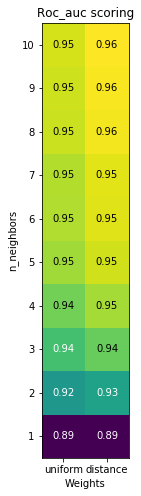

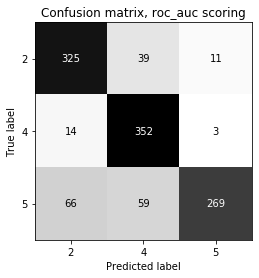

In [34]:
start = time.time()
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10], 'weights' : ['uniform', 'distance']} 
grid_search = GridSearchCV(knn, param_grid, scoring = "roc_auc_ovr", cv = 5)
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
end = time.time()

plt.figure(figsize = (10,8))
scores = grid_search.cv_results_['mean_test_score'].reshape(10,2)
plt.title("Roc_auc scoring")
ax1 = mglearn.tools.heatmap(scores, xlabel = 'Weights', ylabel = 'n_neighbors', xticklabels = param_grid['weights'], yticklabels = param_grid['n_neighbors'], cmap = 'viridis')


print("Best parameter, roc_auc scoring: {}".format(grid_search.best_params_))
print("Test set AUC: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
print("Accurancy on test: {:.2f}".format(accuracy_score(y_test, pred)))
print("Time: {:.2f}".format(end - start))

plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

Best parameter: {'n_neighbors': 6, 'weights': 'distance'}
Accurancy on test: 0.84

Time: 3.81


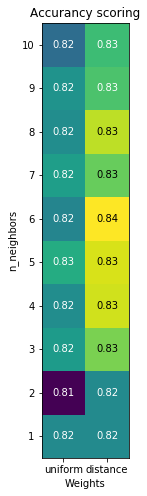

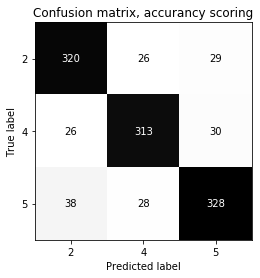

In [33]:
#KNN + PCA
start = time.time()
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10], 'weights' : ['uniform', 'distance']} 
grid_search = GridSearchCV(knn, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(10,2)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'Weights', ylabel = 'n_neighbors', xticklabels = param_grid['weights'], yticklabels = param_grid['n_neighbors'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Best parameter: {'C': 10}
Accuracy on test: 0.77
Time: 83.19


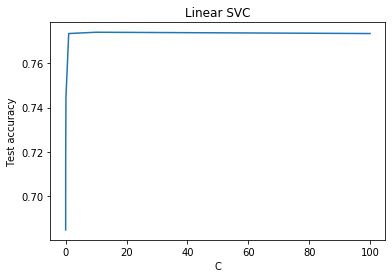

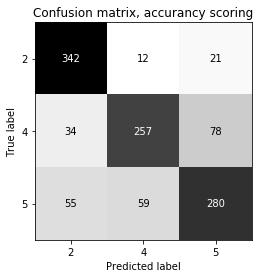

In [51]:
#Linear SVC
start = time.time()
svc = LinearSVC(max_iter = 10000)
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svc, param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()

plt.figure()
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], scores)
plt.xlabel("C")
plt.ylabel("Test accuracy")
plt.title("Linear SVC")
print("Best parameter: {}".format(grid_search.best_params_))
print("Accuracy on test: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))
print("Time: {:.2f}".format(end - start))

plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Best parameter: {'C': 0.01}
Accuracy on test: 0.74
Time: 123.48


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


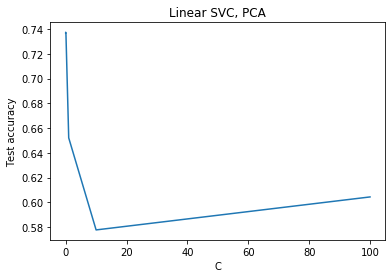

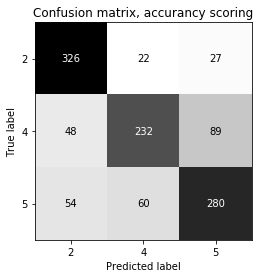

In [53]:
#linear svm + PCA
start = time.time()
svc = LinearSVC(max_iter = 10000)
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svc, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()

plt.figure()
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], scores)
plt.xlabel("C")
plt.ylabel("Test accuracy")
plt.title("Linear SVC, PCA")
print("Best parameter: {}".format(grid_search.best_params_))
print("Accuracy on test: {:.2f}".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))

plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'C': 10, 'gamma': 1}
Accurancy on test: 0.94

Time: 117.36


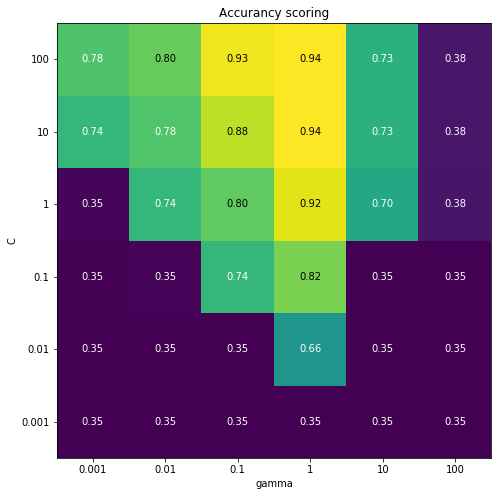

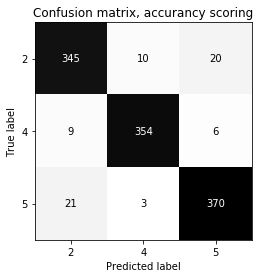

In [35]:
###SVM, accurancy, scaled
start = time.time()
svm = SVC(kernel = 'rbf')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svm, param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
end = time.time()

plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'gamma', ylabel = 'C', xticklabels = param_grid['gamma'], yticklabels = param_grid['C'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test_scaled, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'C': 0.01, 'degree': 4}
Accurancy on test: 0.94

Time: 212.01


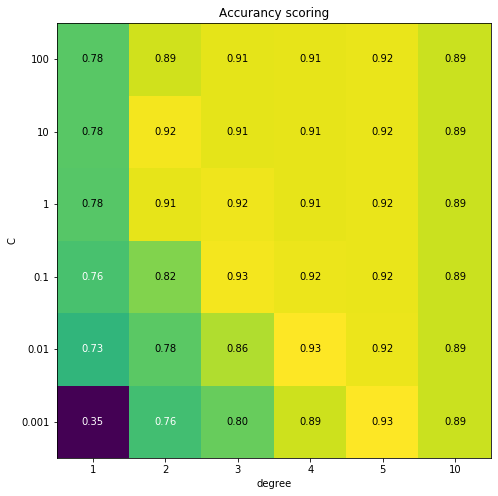

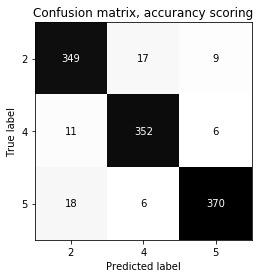

In [36]:
###SVM, poly, accurancy, scaled
start = time.time()
svm = SVC(kernel = 'poly')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'degree' : [1,2,3,4,5,10]}
grid_search = GridSearchCV(svm, param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
end = time.time()

plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'degree', ylabel = 'C', xticklabels = param_grid['degree'], yticklabels = param_grid['C'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test_scaled, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'C': 10, 'gamma': 0.001}
Accurancy on test: 0.82

Time: 190.97


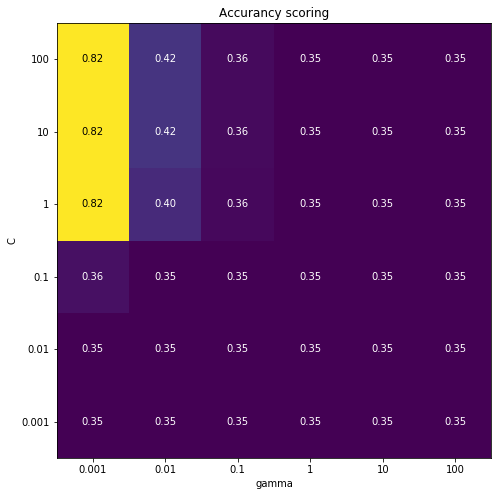

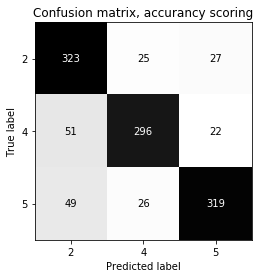

In [37]:
#SVM + PCA
#RBF
start = time.time()
svm = SVC(kernel = 'rbf')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svm, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'gamma', ylabel = 'C', xticklabels = param_grid['gamma'], yticklabels = param_grid['C'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'C': 100, 'degree': 5}
Accurancy on test: 0.76

Time: 137.61


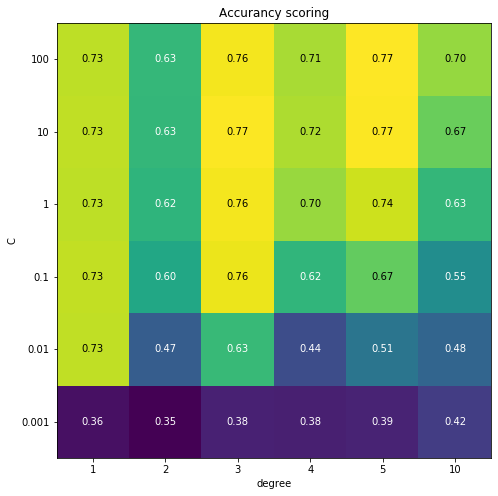

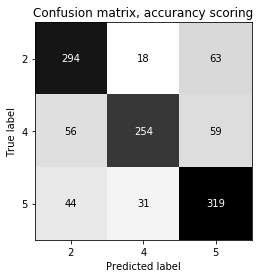

In [38]:
#SVM + PCA
#POLY
start = time.time()
svm = SVC(kernel = 'poly')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'degree' : [1,2,3,4,5,10]}
grid_search = GridSearchCV(svm, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'degree', ylabel = 'C', xticklabels = param_grid['degree'], yticklabels = param_grid['C'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'max_depth': 50, 'max_leaf_nodes': 200}
Accurancy on test: 0.81

Time: 35.43


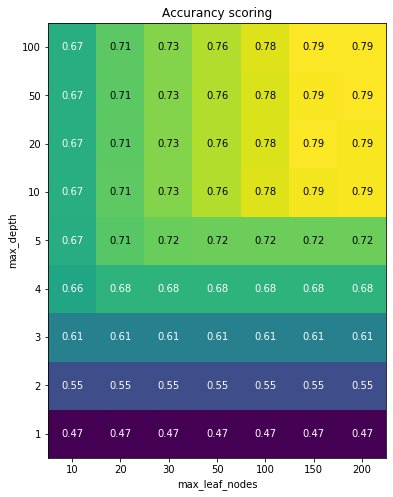

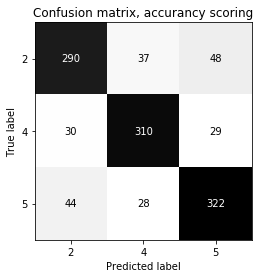

In [39]:
###DTR, accurancy, scaled
start = time.time()
tree = DecisionTreeClassifier(criterion = 'entropy')
param_grid = {'max_depth' : [1,2,3,4,5,10,20,50, 100], 'max_leaf_nodes' : [10,20,30,50,100, 150, 200]}
grid_search = GridSearchCV(tree, param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score'].reshape(9,7)
end = time.time()

plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'max_leaf_nodes', ylabel = 'max_depth', xticklabels = param_grid['max_leaf_nodes'], yticklabels = param_grid['max_depth'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test_scaled, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter, roc_auc scoring: {'max_depth': 100, 'max_leaf_nodes': 50}
AUC score: 0.90

Accurancy on test: 0.76
Time: 36.31


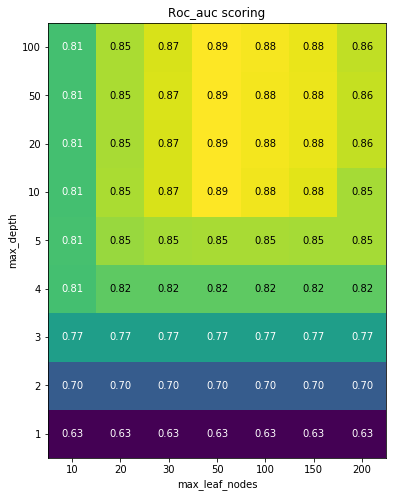

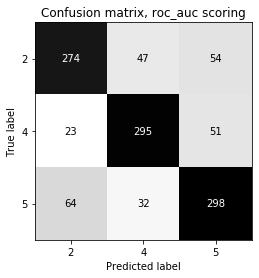

In [40]:
###DTR, roc_auc, scaled
start = time.time()
tree = DecisionTreeClassifier(criterion = 'entropy')
param_grid = {'max_depth' : [1,2,3,4,5,10,20,50, 100], 'max_leaf_nodes' : [10,20,30,50,100,150,200]}
grid_search = GridSearchCV(tree, param_grid, cv = 5, scoring = "roc_auc_ovr")
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score'].reshape(9,7)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'max_leaf_nodes', ylabel = 'max_depth', xticklabels = param_grid['max_leaf_nodes'], yticklabels = param_grid['max_depth'], cmap = 'viridis')
plt.title("Roc_auc scoring")

print("Best parameter, roc_auc scoring: {}".format(grid_search.best_params_))
print("AUC score: {:.2f}\n".format(grid_search.score(X_test_scaled, y_test)))
print("Accurancy on test: {:.2f}".format(accuracy_score(y_test, pred)))
print("Time: {:.2f}".format(end - start))

plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

Best parameter: {'max_depth': 10, 'max_leaf_nodes': 100}
Accurancy on test: 0.77

Time: 8.30


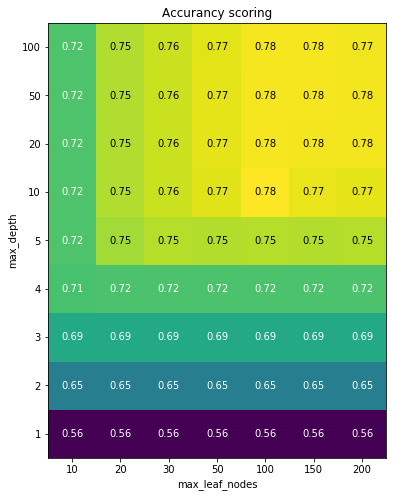

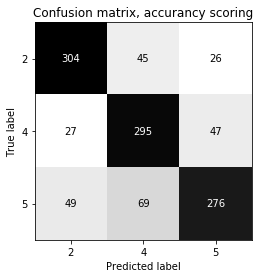

In [41]:
#DTR + PCA
start = time.time()
tree = DecisionTreeClassifier(criterion = 'entropy')
param_grid = {'max_depth' : [1,2,3,4,5,10,20,50, 100], 'max_leaf_nodes' : [10,20,30,50,100, 150, 200]}
grid_search = GridSearchCV(tree, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(9,7)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'max_leaf_nodes', ylabel = 'max_depth', xticklabels = param_grid['max_leaf_nodes'], yticklabels = param_grid['max_depth'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

Best parameter: {'activation': 'tanh', 'alpha': 0.1}
Accurancy on test: 0.87

Time: 243.14


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


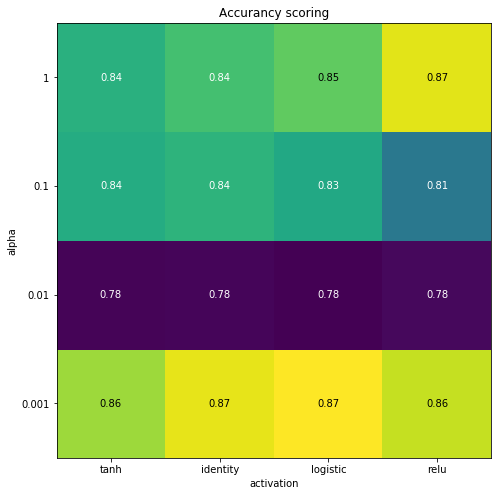

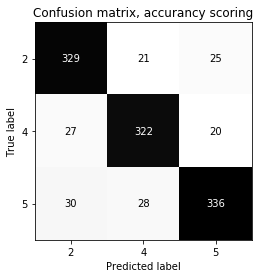

In [42]:
###MLP, accurancy, scaled
start = time.time()
mlp = MLPClassifier(solver = 'lbfgs')
param_grid = {'alpha' : [0.001, 0.01, 0.1, 1], 'activation' : ['tanh', 'identity', 'logistic', 'relu']}
grid_search = GridSearchCV(mlp, param_grid)
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score'].reshape(4,4)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'activation', ylabel = 'alpha', xticklabels = param_grid['activation'], yticklabels = param_grid['alpha'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test_scaled, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

Best parameter, roc_auc scoring: {'activation': 'tanh', 'alpha': 0.01}
AUC on test: 0.96

Accurancy on test: 0.859402460456942
Time: 247.71


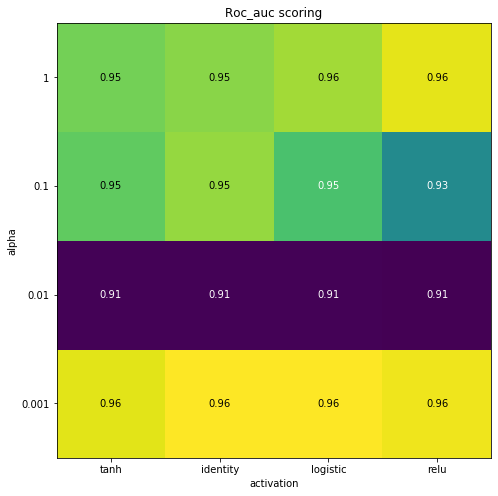

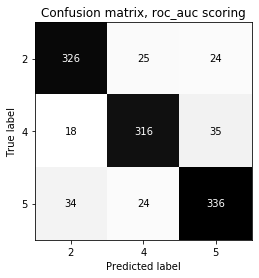

In [43]:
###MLP, roc_auc, scaled
start = time.time()
mlp = MLPClassifier(solver = 'lbfgs')
param_grid = {'alpha' : [0.001, 0.01, 0.1, 1], 'activation' : ['tanh', 'identity', 'logistic', 'relu']}
grid_search = GridSearchCV(mlp, param_grid, scoring = "roc_auc_ovr")
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score'].reshape(4,4)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'activation', ylabel = 'alpha', xticklabels = param_grid['activation'], yticklabels = param_grid['alpha'], cmap = 'viridis')
plt.title("Roc_auc scoring")

print("Best parameter, roc_auc scoring: {}".format(grid_search.best_params_))
print("AUC on test: {:.2f}\n".format(grid_search.score(X_test_scaled, y_test)))
print("Accurancy on test: {}".format(accuracy_score(y_test, pred)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

Best parameter: {'activation': 'relu', 'alpha': 1}
Accurancy on test: 0.80

Time: 201.91


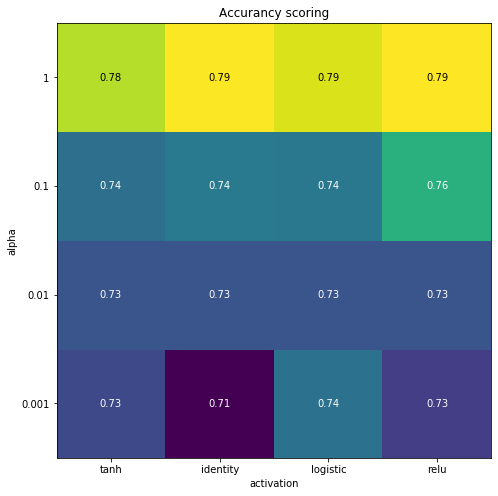

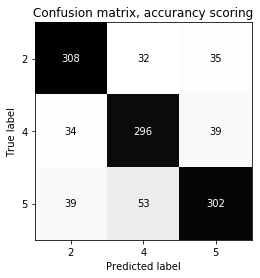

In [44]:
#PCA + MLP
#
start = time.time()
mlp = MLPClassifier(solver = 'lbfgs')
param_grid = {'alpha' : [0.001, 0.01, 0.1, 1], 'activation' : ['tanh', 'identity', 'logistic', 'relu']}
grid_search = GridSearchCV(mlp, param_grid)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(4,4)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'activation', ylabel = 'alpha', xticklabels = param_grid['activation'], yticklabels = param_grid['alpha'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'n_estimators': 150}
Accurancy on test: 0.94

Time: 46.85


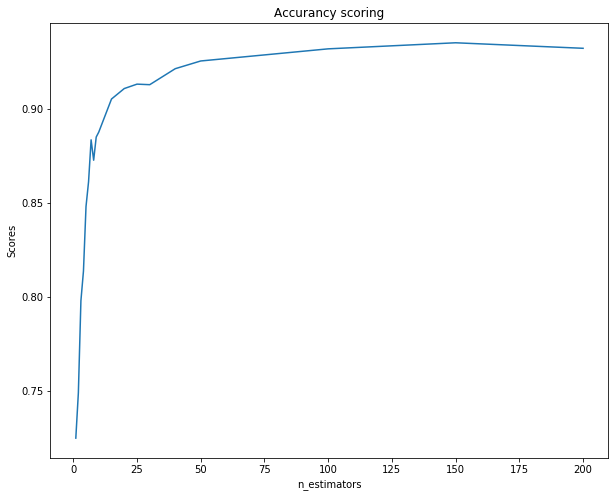

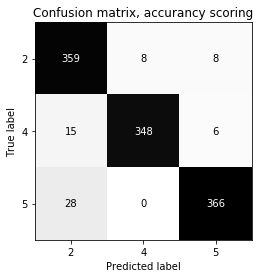

In [46]:
###FOREST, accurancy, scaled
start = time.time()
forest = RandomForestClassifier()
param_grid = {'n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(forest, param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Accurancy scoring")
plt.xlabel("n_estimators")
plt.ylabel("Scores")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test_scaled, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter, roc_auc scoring: {'n_estimators': 200}
AUC score on test: 0.99

Accurancy on test: 0.94
Time: 47.12


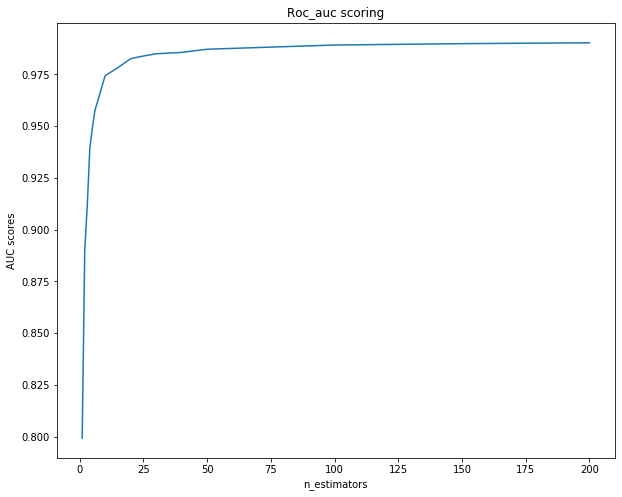

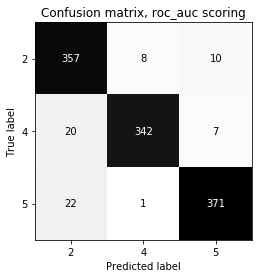

In [47]:
###FOREST, roc_auc, scaled
start = time.time()
forest = RandomForestClassifier()
param_grid = {'n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = "roc_auc_ovr")
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Roc_auc scoring")
plt.xlabel("n_estimators")
plt.ylabel("AUC scores")

print("Best parameter, roc_auc scoring: {}".format(grid_search.best_params_))
print("AUC score on test: {:.2f}\n".format(grid_search.score(X_test_scaled, y_test)))
print("Accurancy on test: {:.2f}".format(accuracy_score(y_test, pred)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

Best parameter: {'n_estimators': 200}
Accurancy on test: 0.84

Time: 24.54


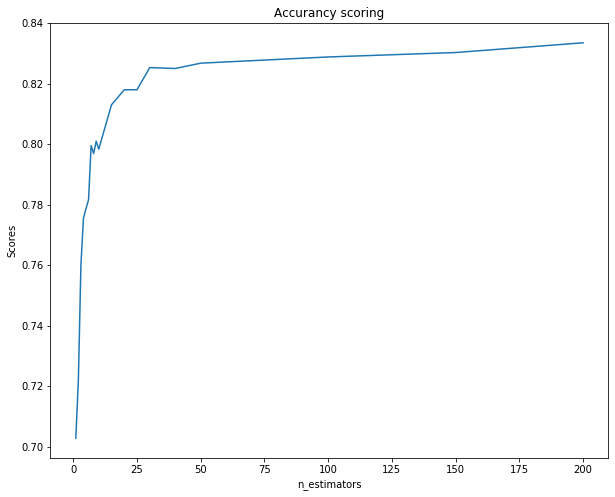

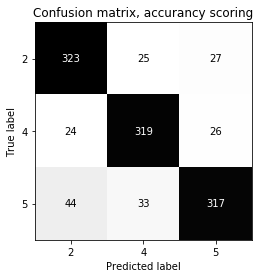

In [54]:
#PCA + forest
start = time.time()
forest = RandomForestClassifier()
param_grid = {'n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(forest, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Accurancy scoring")
plt.xlabel("n_estimators")
plt.ylabel("Scores")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'n_estimators': 150}
Accurancy on test: 0.93

Time: 46.70


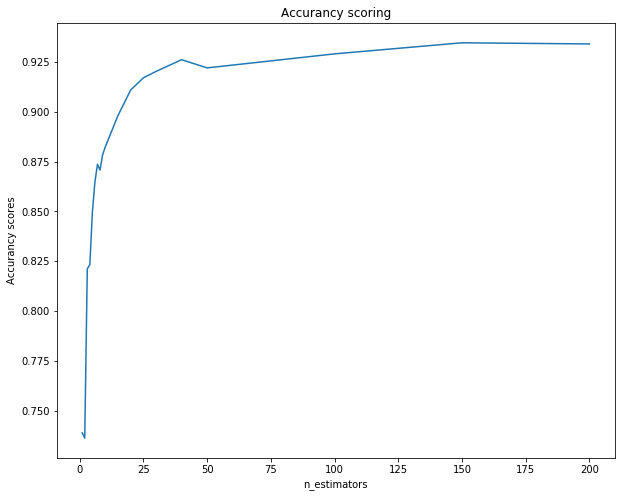

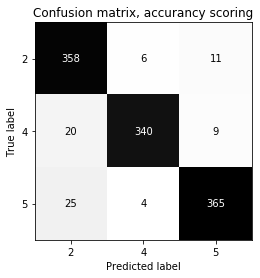

In [55]:
###GRADIENT, accurancy, scaled
start = time.time()
gbrt = GradientBoostingClassifier()
param_grid = {'n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(forest, param_grid, cv = 5)
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Accurancy scoring")
plt.xlabel("n_estimators")
plt.ylabel("Accurancy scores")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test_scaled, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter, roc_auc scoring: {'n_estimators': 200}
AUC score on test: 0.99

Accurancy on test: 0.94
Time: 47.83


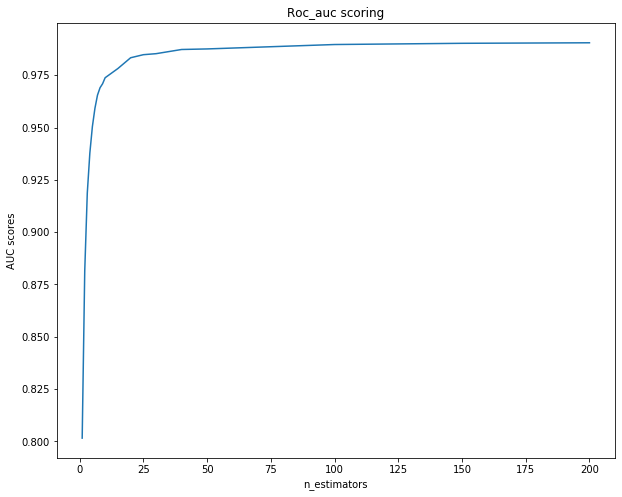

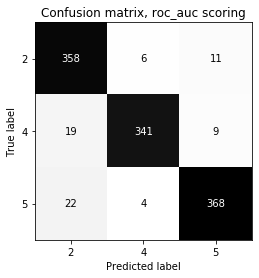

In [56]:
###GRADIENT, roc_auc, scaled
start = time.time()
gbrt = GradientBoostingClassifier()
param_grid = {'n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = "roc_auc_ovr")
grid_search.fit(X_train_scaled, y_train)
pred = grid_search.predict(X_test_scaled)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Roc_auc scoring")
plt.xlabel("n_estimators")
plt.ylabel("AUC scores")

print("Best parameter, roc_auc scoring: {}".format(grid_search.best_params_))
print("AUC score on test: {:.2f}\n".format(grid_search.score(X_test_scaled, y_test)))
print("Accurancy on test: {:.2f}".format(accuracy_score(y_test, pred)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

Best parameter: {'n_estimators': 200}
Accurancy on test: 0.84

Time: 24.00


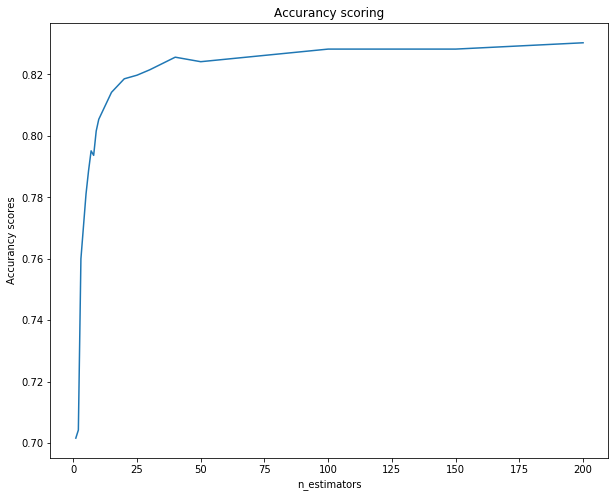

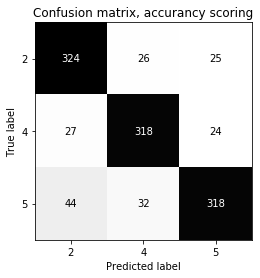

In [57]:
#PCA + Gradient
start = time.time()
gbrt = GradientBoostingClassifier()
param_grid = {'n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(forest, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Accurancy scoring")
plt.xlabel("n_estimators")
plt.ylabel("Accurancy scores")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

In [58]:
##Voting classifier
model_accurancy = VotingClassifier(estimators = 
                        [('knn', KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')),
                        ('svc_rbf', SVC(kernel = 'rbf', C = 10, gamma = 1)),
                        ('svc_poly', SVC(kernel = 'poly', C = 0.01, degree = 4)),
                        ('tree', DecisionTreeClassifier(max_depth = 50, max_leaf_nodes = 200, criterion = 'entropy')),
                        ('mlp', MLPClassifier(solver = 'lbfgs', activation = 'tanh', alpha = 0.1)),
                        ('forest', RandomForestClassifier(n_estimators = 150)),
                        ('gbrt', GradientBoostingClassifier(n_estimators = 150))],          
                         voting = 'hard')

model_accurancy.fit(X_train_scaled, y_train)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=1,
                                                   p=2, weights='uniform')),
                             ('svc_rbf',
                              SVC(C=10, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=1, kernel='rbf', max_iter=-1,
                                  probability=False, rando...
                                                         max_leaf_nodes=None,
                                                         min_impuri

Voting Test score: 0.98
              precision    recall  f1-score   support

         2.0       0.97      0.97      0.97       375
         4.0       0.98      0.98      0.98       369
         5.0       0.97      0.98      0.97       394

    accuracy                           0.98      1138
   macro avg       0.98      0.98      0.98      1138
weighted avg       0.98      0.98      0.98      1138



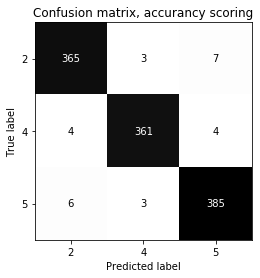

In [65]:
print("Voting Test score: {:.2f}".format(model_accurancy.score(X_test_scaled, y_test)))
pred = model_accurancy.predict(X_test_scaled)
print(classification_report(y_test, pred))
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

In [72]:
model_auc = VotingClassifier(estimators = 
                        [('knn', KNeighborsClassifier(n_neighbors = 10, weights = 'distance')), 
                        ('svc_rbf', SVC(kernel = 'rbf', C = 10, gamma = 1)),
                        ('svc_poly', SVC(kernel = 'poly', C = 0.01, degree = 4)),
                        ('tree', DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 50, criterion = 'entropy')),
                        ('mlp', MLPClassifier(solver = 'lbfgs', activation = 'tanh', alpha = 0.01)),
                        ('forest', RandomForestClassifier(n_estimators = 200)),
                        ('gbrt', GradientBoostingClassifier(n_estimators = 200))],
                         voting = 'hard')

model_auc.fit(X_train_scaled, y_train)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=10,
                                                   p=2, weights='distance')),
                             ('svc_linear',
                              LinearSVC(C=10, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_stat...
                                                         max_leaf_nodes=None,
                                             

Voting test score: 0.94
              precision    recall  f1-score   support

         2.0       0.90      0.94      0.92       375
         4.0       0.95      0.95      0.95       369
         5.0       0.97      0.92      0.94       394

    accuracy                           0.94      1138
   macro avg       0.94      0.94      0.94      1138
weighted avg       0.94      0.94      0.94      1138



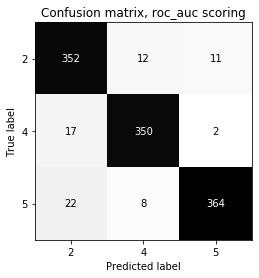

In [73]:
print("Voting test score: {:.2f}".format(model_auc.score(X_test_scaled, y_test)))
pred = model_auc.predict(X_test_scaled)
print(classification_report(y_test, pred))
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

In [74]:
pca_model = VotingClassifier(estimators = 
                        [('knn', KNeighborsClassifier(n_neighbors = 6, weights = 'distance')),
                        ('svc_rbf', SVC(kernel = 'rbf', C = 10, gamma = 0.001)),
                        ('svc_poly', SVC(kernel = 'poly', C = 100, degree = 5)),
                        ('tree', DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 100, criterion = 'entropy')),
                        ('mlp', MLPClassifier(solver = 'lbfgs', activation = 'relu', alpha = 1)),
                        ('forest', RandomForestClassifier(n_estimators = 200)),
                        ('gbrt', GradientBoostingClassifier(n_estimators = 200))],
                         voting = 'hard')
pca_model.fit(X_pca_train, y_pca_train)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=6,
                                                   p=2, weights='distance')),
                             ('svc_rbf',
                              SVC(C=10, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.001, kernel='rbf', max_iter=-1,
                                  probability=False,...
                                                         max_leaf_nodes=None,
                                                         min_impurit

Voting Test score: 0.84
              precision    recall  f1-score   support

         2.0       0.82      0.88      0.85       375
         4.0       0.84      0.85      0.85       369
         5.0       0.87      0.80      0.84       394

    accuracy                           0.84      1138
   macro avg       0.84      0.84      0.84      1138
weighted avg       0.85      0.84      0.84      1138



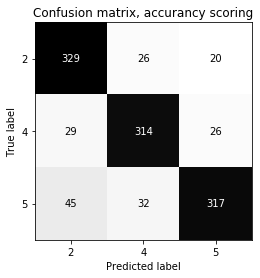

In [75]:
print("Voting Test score: {:.2f}".format(pca_model.score(X_pca_test, y_pca_test)))
pred = pca_model.predict(X_pca_test)
print(classification_report(y_pca_test, pred))
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

In [16]:
#Stacking classifier
stacking = StackingClassifier(estimators = 
                        [('knn', KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')),
                        ('svc_rbf', SVC(kernel = 'rbf', C = 10, gamma = 1)),
                        ('svc_poly', SVC(kernel = 'poly', C = 0.01, degree = 4)),
                        ('tree', DecisionTreeClassifier(max_depth = 50, max_leaf_nodes = 200, criterion = 'entropy')),
                        ('mlp', MLPClassifier(solver = 'lbfgs', activation = 'tanh', alpha = 0.1)),
                        ('forest', RandomForestClassifier(n_estimators = 150)),
                        ('gbrt', GradientBoostingClassifier(n_estimators = 150))],
                             cv = 5)
stacking.fit(X_train_scaled, y_train)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

StackingClassifier(cv=5,
                   estimators=[('knn',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=1,
                                                     p=2, weights='uniform')),
                               ('svc_rbf',
                                SVC(C=10, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma=1, kernel='rbf', max_iter=-1,
                                    probability=Fals...
                                                           min_impurity_decrease=0.0,
                

Stacking Test score: 0.97
              precision    recall  f1-score   support

         2.0       0.95      0.95      0.95       375
         4.0       0.99      0.97      0.98       369
         5.0       0.96      0.97      0.97       394

    accuracy                           0.97      1138
   macro avg       0.97      0.97      0.97      1138
weighted avg       0.97      0.97      0.97      1138



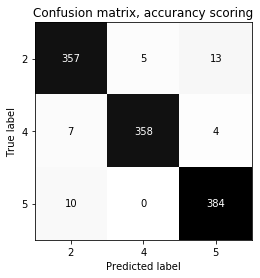

In [18]:
print("Stacking Test score: {:.2f}".format(stacking.score(X_test_scaled, y_test)))
pred = stacking.predict(X_test_scaled)
print(classification_report(y_test, pred))
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

In [21]:
pca_stacking = StackingClassifier(estimators = 
                        [('knn', KNeighborsClassifier(n_neighbors = 6, weights = 'distance')),
                        ('svc_rbf', SVC(kernel = 'rbf', C = 10, gamma = 0.001)),
                        ('svc_poly', SVC(kernel = 'poly', C = 100, degree = 5)),
                        ('tree', DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 100, criterion = 'entropy')),
                        ('mlp', MLPClassifier(solver = 'lbfgs', activation = 'relu', alpha = 1)),
                        ('forest', RandomForestClassifier(n_estimators = 200)),
                        ('gbrt', GradientBoostingClassifier(n_estimators = 200))],
                         cv = 5)
pca_stacking.fit(X_pca_train, y_pca_train)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

StackingClassifier(cv=5,
                   estimators=[('knn',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=6,
                                                     p=2, weights='distance')),
                               ('svc_rbf',
                                SVC(C=10, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma=0.001, kernel='rbf', max_iter=-1,
                                    probability...
                                                           min_impurity_decrease=0.0,
                

Stacking Test score: 0.84
              precision    recall  f1-score   support

         2.0       0.80      0.83      0.82       375
         4.0       0.86      0.88      0.87       369
         5.0       0.84      0.80      0.82       394

    accuracy                           0.84      1138
   macro avg       0.84      0.84      0.84      1138
weighted avg       0.84      0.84      0.84      1138



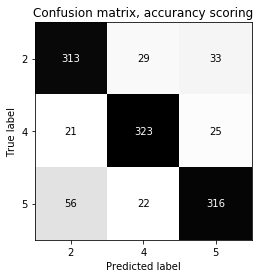

In [22]:
print("Stacking Test score: {:.2f}".format(pca_stacking.score(X_pca_test, y_pca_test)))
pred = pca_stacking.predict(X_pca_test)
print(classification_report(y_pca_test, pred))
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

In [5]:
#######EX2

In [24]:
df_qsar = pd.read_csv(r'C:\Users\Ivan\Desktop\qsar_fish_toxicity.csv')

In [169]:
df_qsar

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [25]:
response = df_qsar['response']

Text(0.5, 1.0, 'Histogram of quantitative response L50')

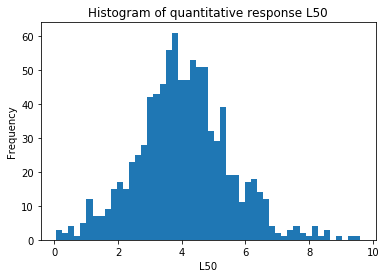

In [8]:
plt.hist(response, bins = 50)
plt.xlabel("L50")
plt.ylabel("Frequency")
plt.title("Histogram of quantitative response L50")

In [9]:
print("To check if the data is normally distributed I will perform Jarque-Bera test")

To check if the data is normally distributed I will perform Jarque-Bera test


In [10]:
n = len(response)
moment_2 = moment(response, 2)
moment_3 = moment(response, 3)
moment_4 = moment(response, 4)

S = moment_3 / ((moment_2)**(3/2))
K = moment_4 / (moment_2**2)

JB = n/6 * (S**2 + 1/4*(K - 3)**2)
print("Variable JB is chi-square distributed with two degrees of freedome")
print("5% significance critical value: ", 5.99)
print("Test statistics: {:.2f}".format(JB))
print("We reject null hypothesis that data is normally distributed")

Variable JB is chi-square distributed with two degrees of freedome
5% significance critical value:  5.99
Test statistics: 25.75
We reject null hypothesis that data is normally distributed


In [11]:
response_ln = np.log(response)
moment_2 = moment(response_ln, 2)
moment_3 = moment(response_ln, 3)
moment_4 = moment(response_ln, 4)

S = moment_3 / ((moment_2)**(3/2))
K = moment_4 / (moment_2**2)

JB = n/6 * (S**2 + 1/4*(K - 3)**2)
print("Variable JB is chi-square distributed with two degrees of freedome")
print("5% significance critical value: ", 5.99)
print("Test statistics: {:.2f}".format(JB))
print("We reject null hypothesis that data is normally distributed")

Variable JB is chi-square distributed with two degrees of freedome
5% significance critical value:  5.99
Test statistics: 7224.28
We reject null hypothesis that data is normally distributed


In [12]:
response_sin = np.sin(response)
moment_2 = moment(response_sin, 2)
moment_3 = moment(response_sin, 3)
moment_4 = moment(response_sin, 4)

S = moment_3 / ((moment_2)**(3/2))
K = moment_4 / (moment_2**2)

JB = n/6 * (S**2 + 1/4*(K - 3)**2)
print("Variable JB is chi-square distributed with two degrees of freedome")
print("5% significance critical value: ", 5.99)
print("Test statistics: {:.2f}".format(JB))
print("We reject null hypothesis that data is normally distributed")

Variable JB is chi-square distributed with two degrees of freedome
5% significance critical value:  5.99
Test statistics: 94.46
We reject null hypothesis that data is normally distributed


In [13]:
print("Since lowest value of JB statistics is obtained with the non-transformed data, I will use it in further analysis")

Since lowest value of JB statistics is obtained with the non-transformed data, I will use it in further analysis


In [26]:
cic0 = df_qsar['CIC0']
sm1 = df_qsar['SM1_Dz(Z)']
gat = df_qsar['GATS1i']
ndsch = df_qsar['NdsCH']
ndssc = df_qsar['NdssC']
mlogp = df_qsar['MLOGP']

Text(0.5, 1.0, 'Relationship: MLOGP vs L50')

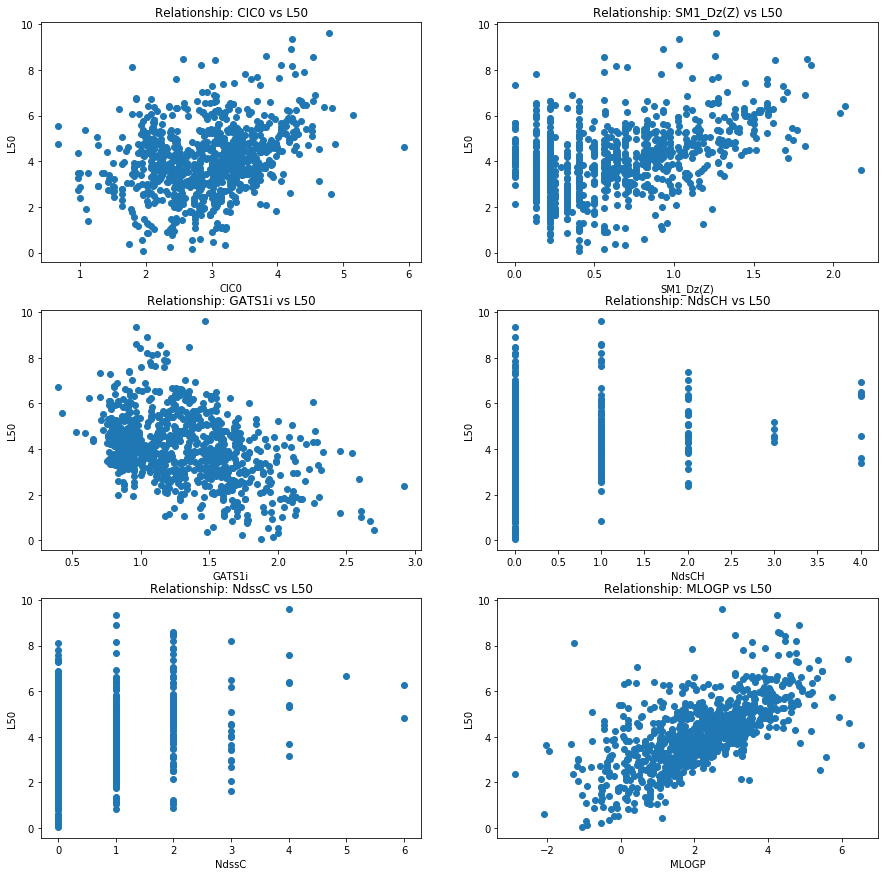

In [15]:
fig, ax = plt.subplots(3,2, figsize = (15,15))
ax[0,0].plot(cic0, response, 'o')
ax[0,0].set_xlabel("CIC0")
ax[0,0].set_ylabel("L50")
ax[0,0].set_title("Relationship: CIC0 vs L50")

ax[0,1].plot(sm1, response, 'o')
ax[0,1].set_xlabel("SM1_Dz(Z)")
ax[0,1].set_ylabel("L50")
ax[0,1].set_title("Relationship: SM1_Dz(Z) vs L50")

ax[1,0].plot(gat, response, 'o')
ax[1,0].set_xlabel("GATS1i")
ax[1,0].set_ylabel("L50")
ax[1,0].set_title("Relationship: GATS1i vs L50")

ax[1,1].plot(ndsch, response, 'o')
ax[1,1].set_xlabel("NdsCH")
ax[1,1].set_ylabel("L50")
ax[1,1].set_title("Relationship: NdsCH vs L50")

ax[2,0].plot(ndssc, response, 'o')
ax[2,0].set_xlabel("NdssC")
ax[2,0].set_ylabel("L50")
ax[2,0].set_title("Relationship: NdssC vs L50")

ax[2,1].plot(mlogp, response, 'o')
ax[2,1].set_xlabel("MLOGP")
ax[2,1].set_ylabel("L50")
ax[2,1].set_title("Relationship: MLOGP vs L50")

Text(0.5, 1.0, 'Correlation matrix')

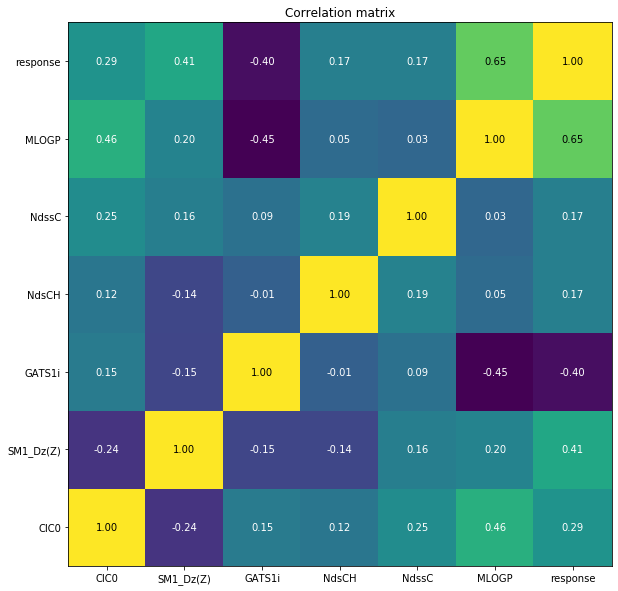

In [16]:
corr = df_qsar.corr()
corr_values = corr.values
plt.figure(figsize = (10,10))
mglearn.tools.heatmap(corr.values, xlabel = '', ylabel = '', xticklabels = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'response'], yticklabels = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'response'], cmap = 'viridis')
plt.title("Correlation matrix")

In [30]:
df = df_qsar.values
X = df[:,0:6]
y = df[:,6]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("To increase accurancy with linear regression I will use cross validation")


Training set score: 0.57
Test set score: 0.60
To increase accurancy with linear regression I will use cross validation


In [27]:
print("Linear regression with cross validation")
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv = 5)
print("Cross-validations scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(np.mean(scores)))
print("Test score")

Linear regression with cross validation
Cross-validations scores: [0.47937584 0.49342697 0.41881636 0.67962423 0.60322613]
Mean cross-validation score: 0.53
Test score


In [30]:
param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Test set score with ridge regression: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'alpha': 1}
Test set score with ridge regression: 0.60


In [31]:
param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
lasso = Lasso(max_iter = 100000)
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Test set score with lasso regression {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'alpha': 0.001}
Test set score with lasso regression 0.60


Best parameters: {'C': 100}
Test set accurancy: 0.60


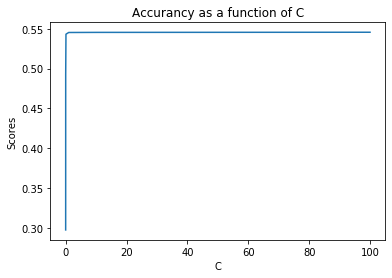

In [36]:
#SVR, linear
svr = SVR(gamma = 'auto', kernel = 'linear')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score']
plt.figure()
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], scores)
plt.xlabel("C")
plt.ylabel("Scores")
plt.title("Accurancy as a function of C")

print("Best parameters: {}".format(grid_search.best_params_))
print("Test set accurancy: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'C': 1, 'gamma': 0.1}
Test set accurancy: 0.64


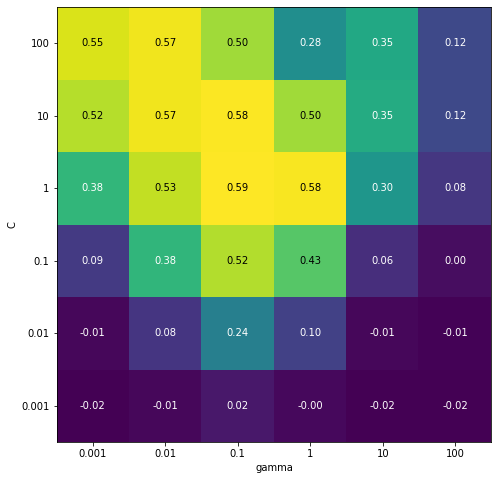

In [38]:
## SVR, rbf
svr = SVR(kernel = 'rbf')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'gamma', ylabel = 'C', xticklabels = param_grid['gamma'], yticklabels = param_grid['C'], cmap = 'viridis')

print("Best parameters: {}".format(grid_search.best_params_))
print("Test set accurancy: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'C': 1, 'degree': 1}
Test set accurancy: 0.65


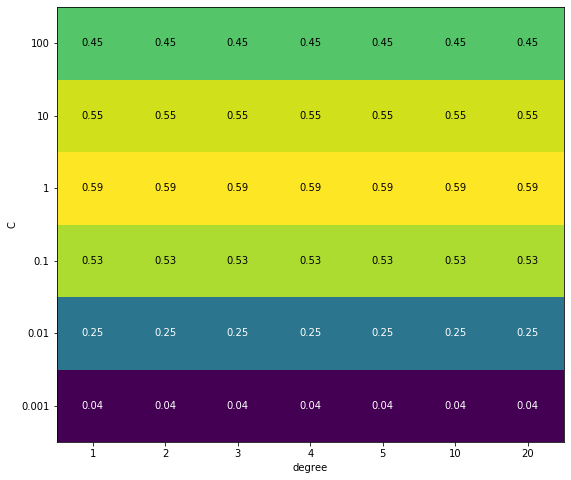

In [31]:
###SVR, poly
svr = SVR(kernel = 'rbf', gamma = 'auto')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'degree' : [1,2,3,4,5,10,20]}
grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score'].reshape(6,7)
plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'degree', ylabel = 'C', xticklabels = param_grid['degree'], yticklabels = param_grid['C'], cmap = 'viridis')

print("Best parameters: {}".format(grid_search.best_params_))
print("Test set accurancy: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'max_depth': 4, 'max_leaf_nodes': 30}
Test set accurancy: 0.44


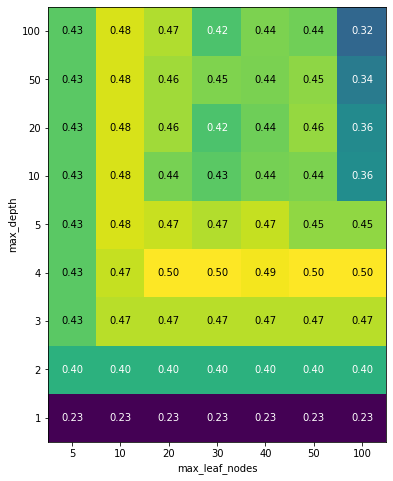

In [32]:
#dtr
dtrr = DecisionTreeRegressor(criterion = 'mae')
param_grid = {'max_depth' : [1,2,3,4,5,10,20,50,100], 'max_leaf_nodes' : [5, 10, 20, 30, 40, 50, 100]}
grid_search = GridSearchCV(dtrr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score'].reshape(9,7)
plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'max_leaf_nodes', ylabel = 'max_depth', xticklabels = param_grid['max_leaf_nodes'], yticklabels = param_grid['max_depth'], cmap = 'viridis')

print("Best parameters: {}".format(grid_search.best_params_))
print("Test set accurancy: {:.2f}".format(grid_search.score(X_test, y_test)))

In [34]:
df_qsar_indiv = pd.read_csv(r'C:\Users\Ivan\Desktop\2046587\2046587_qsar.csv', index_col = 0)
df_matrix = df_qsar_indiv.values

In [140]:
df_qsar_indiv

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,response
0,3.260,0.829,1.676,NaN,NaN,1.453,3.770
1,NaN,0.580,NaN,0.0,NaN,1.348,3.115
2,2.125,0.638,0.831,0.0,0.0,1.348,3.531
3,3.027,0.331,1.472,1.0,0.0,1.807,NaN
4,2.094,0.827,NaN,0.0,0.0,1.886,NaN
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,NaN,2.0,0.736,3.109
904,3.652,0.872,0.867,2.0,NaN,3.983,4.040
905,NaN,0.916,NaN,0.0,6.0,2.918,4.818
906,2.831,1.393,NaN,0.0,1.0,NaN,5.317


In [35]:
imp1 = SimpleImputer(strategy = 'mean').fit(df_matrix)
X_imp1 = imp1.transform(df_matrix)

min_mse = 1
min_k = 0
for i in np.arange(1,50,1):
    imp2 = KNNImputer(n_neighbors = i, weights = 'uniform').fit(df_matrix)
    X_imp2 = imp2.transform(df_matrix)
    mse2 = mean_squared_error(df_qsar.values, X_imp2)
    if mse2 < min_mse:
        min_mse = mse2
        min_k = i

imp2 = KNNImputer(n_neighbors = min_k, weights = 'uniform').fit(df_matrix)
X_imp2 = imp2.transform(df_matrix)

imp3 = SimpleImputer(strategy = 'most_frequent').fit(df_matrix)
X_imp3 = imp3.transform(df_matrix)

In [36]:
mse1 = mean_squared_error(df_qsar.values, X_imp1)
mse2 = mean_squared_error(df_qsar.values, X_imp2)
mse3 = mean_squared_error(df_qsar.values, X_imp3)

print("Strategy = Mean, MSE: {:.2f}".format(mse1))
print("Strategy = KNN {} Imputer, MSE: {:.2f}".format(min_k, mse2))
print("Strategy = Most frequent, MSE: {:.2f}".format(mse3))

Strategy = Mean, MSE: 0.18
Strategy = KNN 47 Imputer, MSE: 0.13
Strategy = Most frequent, MSE: 0.25


In [184]:
#We obtain minimum MSE with KNN imputation, where n_neighbors = 47 and MSE
#value is 0.13

In [40]:
imp_extra = KNNImputer(n_neighbors = 1, weights = 'uniform').fit(df_matrix)
X_imp_extra = imp_extra.transform(df_matrix)
mse = mean_squared_error(df_qsar.values, X_imp_extra)
print("MSE for n_neighbors = 1: {:.2f}".format(mse))

imp_extra = KNNImputer(n_neighbors = 30, weights = 'uniform').fit(df_matrix)
X_imp_extra = imp_extra.transform(df_matrix)
mse = mean_squared_error(df_qsar.values, X_imp_extra)
print("MSE for n_neighbors = 30: {:.2f}".format(mse))

MSE for n_neighbors = 1: 0.28
MSE for n_neighbors = 30: 0.13
